In [1]:
# Import libraries and needed classes

import sys
import os

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

from Code.LogisticRegression.logisticReg.logisticReg import LogisticRegression
from Code.utils.dataset import Dataset
import Code.utils.store_model as store_model

In [2]:
# Set random seed to control randomness

np.random.seed(42)

In [3]:
# Read datasets

dataset = Dataset('../../Dataset/DatasetsGerados/dataset_training_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_training_output.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_input.csv',
                      '../../Dataset/DatasetsGerados/dataset_validation_output.csv',
                      '../../Dataset/professor_inputs.csv',
                      '../../Dataset/professor_outputs.csv')

X_train, y_train, X_validation, y_validation, X_test, y_test, ids = dataset.get_datasets('Text', 'Label', sep='\t', rem_punctuation=False)

In [4]:
import numpy as np

m_train = X_train.shape[0]
perm_train = np.random.permutation(m_train)
X_train_shuffled = X_train[perm_train]
y_train_shuffled = y_train[perm_train]

In [5]:
# Create model

n_features = X_train.shape[1]

model = LogisticRegression(n_features, reg_type='l2', reg_lambda=0.8)

In [6]:
# Train model
model.gradient_descent(X_train_shuffled, y_train_shuffled, X_validation, y_validation, alpha=0.01, iters=20)

0.6849559111643335 0.8812056737588653
0.6849559111643335
0.6770405454871002 0.9059360730593607
0.6693446859985308 0.9179104477611941
0.6618397466440645 0.9289099526066351
0.6545100862892019 0.9352657004830917
0.6473461096885647 0.9432485322896281
0.6403410711205827 0.9478859390363814
0.63348959515486 0.9497536945812808
0.6267869927745965 0.950592885375494
0.6202289455406748 0.9514370664023786
0.6138113598744397 0.9533267130089375
0.6138113598744397
0.6075302998423937 0.9511465603190429
0.6013819560600075 0.953046953046953
0.5953626311236799 0.9518072289156627
0.5894687325271083 0.9527638190954774
0.583696768897476 0.9536290322580645
0.5780433476428724 0.9525731584258325
0.5725051731446763 0.9535353535353536
0.5670790451094362 0.9534412955465587
0.5617618569159015 0.9544994944388271


In [7]:
# Calculate model cost if y_test is available

if y_test is not None:
    print("Final cost:", model.cost_function(X_test, y_test))
    print("Accuracy:", accuracy_score(y_test, model.predict_many(X_test)))
    print("F1 Score:", f1_score(y_test, model.predict_many(X_test), average='macro'))

Final cost: 0.6719154771330668
Accuracy: 0.6666666666666666
F1 Score: 0.6651785714285714


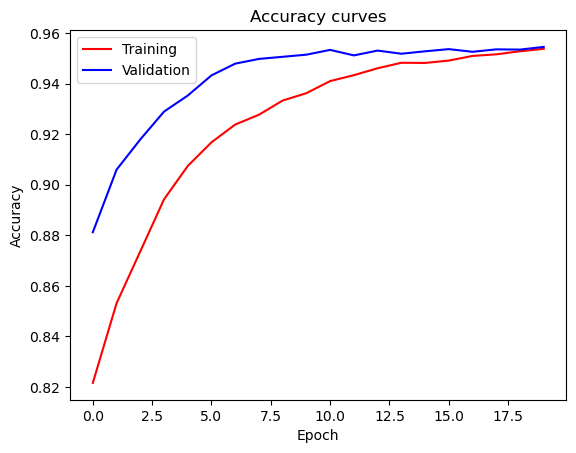

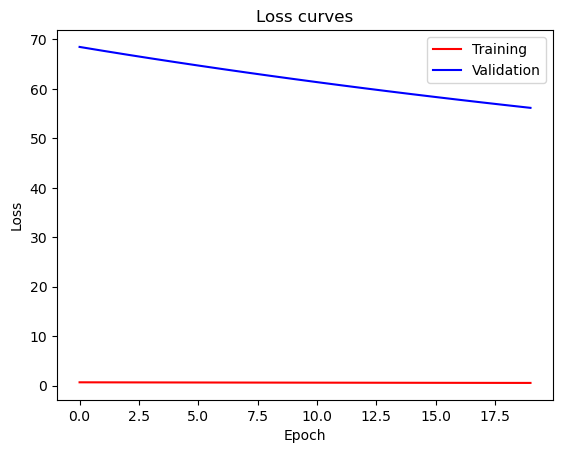

In [8]:
# Plot model

model.plot_train_curves()

In [9]:
# Test model

out = model.predict_many(X_test)
out = out.reshape(out.shape[0], 1)

In [10]:
# Store results
store_results = './Results/log_regression_results.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(store_results), exist_ok=True)

results = dataset.merge_results(ids, out)
results.to_csv(store_results, sep='\t', index=False)

In [11]:
# Store model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

store_model.store_model(model_filepath, model_key, model)

In [12]:
# Retrieve model
model_filepath = './Model/log_regression'
model_key = 'log_regression'

model = store_model.retrieve_model(model_filepath, model_key)